## Degue vs Environmental Analysis.


### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Check version
print(f'pandas version: {pd.__version__}')
print(f'numpy version: {np.__version__}')
print(f'seaborn version: {sns.__version__}')
print(f'sklearn version: {sklearn.__version__}')

pandas version: 1.1.3
numpy version: 1.19.2
seaborn version: 0.11.0
sklearn version: 0.23.2


### Input Data from CSV file.

In [3]:
# Read in Data set
df= pd.read_csv('Dengi.csv',header= 0,encoding= 'unicode_escape')

In [4]:
df.head()

,year,province,province_num,day_raindrop,quant_rain,humbidity_perc,temp_max,temp_min,temp_avg,dead,dead_perc,patient
0,2560,¡ÃÐºÕè,2,187,2711.2,84.9,36.6,18.0,26.8,0,0.00,1093
1,2560,¡ÃØ§à·¾Ï,1,140,2675.8,74.1,39.1,14.6,29.0,14,0.48,2913
2,2560,¡Ò­¨¹ºØÃÕ,3,116,1230.5,70.1,41.0,13.9,28.8,0,0.00,532
3,2560,¡ÒÌÊÔ¹¸Øì,4,119,1713.9,77.6,39.5,9.1,26.8,2,0.24,844
4,2560,¡Óá¾§à¾ªÃ,5,145,1863.8,74.0,39.3,11.9,28.0,0,0.00,592


In [5]:
# Tempolary data preparation and just use for build model 

In [6]:
df = df.drop(columns=['province'])

In [7]:
df.tail(10)

,year,province_num,day_raindrop,quant_rain,humbidity_perc,temp_max,temp_min,temp_avg,dead,dead_perc,patient
298,2563,68,160,2060.2,82.9,39.5,18.7,29.10,1,0.04,2490
299,2563,69,110,1391.2,69.4,40.8,11.1,25.95,0,0.00,2834
300,2563,70,116,1954.6,70.6,41.5,14.2,27.85,1,0.14,733
301,2563,71,107,1121.0,70.2,43.4,11.4,27.40,0,0.00,743
302,2563,72,87,904.4,68.4,36.5,18.0,27.25,0,0.00,997
303,2563,73,111,964.5,68.5,40.6,12.8,26.70,0,0.00,409
304,2563,74,100,1217.8,69.6,42.5,12.1,27.30,1,0.04,2450
305,2563,75,86,1086.1,67.5,43.0,14.0,28.50,1,0.17,575
306,2563,76,92,803.8,71.4,42.5,15.4,28.95,0,0.00,621
307,2563,77,111,1595.1,68.5,40.6,14.2,27.40,3,0.14,2092


In [8]:
df.describe()

,year,province_num,day_raindrop,quant_rain,humbidity_perc,temp_max,temp_min,temp_avg,dead,dead_perc,patient
count,308.000000,308.00000,308.000000,308.000000,308.000000,308.000000,308.000000,308.00000,308.000000,308.000000,308.000000
mean,2561.500000,39.00000,124.587662,1585.342857,74.866558,39.389935,14.745455,27.84789,1.233766,0.086786,1356.500000
std,1.119853,22.26228,30.948556,804.998663,4.432228,2.107856,4.015355,1.06179,2.289452,0.128442,1347.378406
min,2560.000000,1.00000,75.000000,513.200000,63.900000,34.500000,0.600000,23.60000,0.000000,0.000000,62.000000
25%,2560.750000,20.00000,100.000000,1057.175000,71.400000,37.900000,11.600000,27.25000,0.000000,0.000000,476.000000
50%,2561.500000,39.00000,117.000000,1370.850000,74.600000,39.500000,15.000000,27.80000,1.000000,0.030000,894.500000
75%,2562.250000,58.00000,142.250000,1845.500000,77.625000,40.925000,18.000000,28.60000,1.000000,0.130000,1738.750000
max,2563.000000,77.00000,220.000000,5287.300000,85.000000,43.400000,23.400000,31.30000,19.000000,0.880000,8279.000000


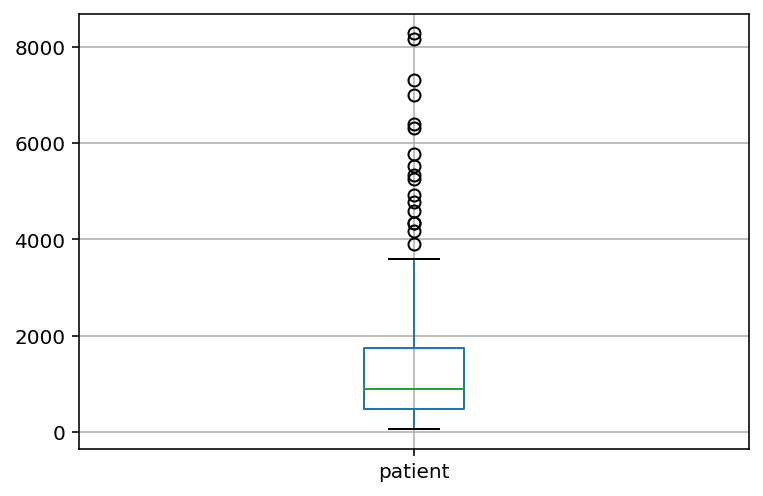

In [9]:
boxplot = df.boxplot(column=['patient'])

In [10]:
# Greater than 50000 replace to mean value.

#df['patient'] = np.where(df['patient'] > 5000, 4110, df['patient'])

In [11]:
#boxplot = df.boxplot(column=['patient'])

In [12]:
df.columns

Index(['year', 'province_num', 'day_raindrop', 'quant_rain', 'humbidity_perc',
       'temp_max', 'temp_min', 'temp_avg', 'dead', 'dead_perc', 'patient'],
      dtype='object')

In [13]:
# Transformation
df_num  = df[['day_raindrop', 'quant_rain', 'humbidity_perc','temp_max', 'temp_min', 'temp_avg', 'dead', 'dead_perc']]

In [14]:
# Choice of Numerical varialable.

#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [15]:
# Version1: select MinMax

num_column = df_num.dtypes[df_num.dtypes != 'object'].index

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)

std_transform_feat = pd.DataFrame(data = df_num)
std_transform_feat[num_column] = scaler.fit_transform(df_num[num_column])

# Show an example of a record with scaling applied
display(std_transform_feat.tail())

,day_raindrop,quant_rain,humbidity_perc,temp_max,temp_min,temp_avg,dead,dead_perc
303,0.248276,0.094531,0.218009,0.685393,0.535088,0.402597,0.000000,0.000000
304,0.172414,0.147588,0.270142,0.898876,0.504386,0.480519,0.052632,0.045455
305,0.075862,0.120002,0.170616,0.955056,0.587719,0.636364,0.052632,0.193182
306,0.117241,0.060870,0.355450,0.898876,0.649123,0.694805,0.000000,0.000000
307,0.248276,0.226619,0.218009,0.685393,0.596491,0.493506,0.157895,0.159091


In [16]:
# log transform to target variable impove RMSE value.

df['patient'] = np.log(df['patient'])

In [17]:
df_cat = df[['year', 'province_num']]
y_tar = df[['patient']]

In [18]:
# Concat all numerical feature to DataFrame
df_pre = pd.concat((df_cat, std_transform_feat,y_tar),axis=1)

In [19]:
df_pre.describe().round(2)

,year,province_num,day_raindrop,quant_rain,humbidity_perc,temp_max,temp_min,temp_avg,dead,dead_perc,patient
count,308.00,308.00,308.00,308.00,308.00,308.00,308.00,308.00,308.00,308.00,308.00
mean,2561.50,39.00,0.34,0.22,0.52,0.55,0.62,0.55,0.06,0.10,6.81
std,1.12,22.26,0.21,0.17,0.21,0.24,0.18,0.14,0.12,0.15,0.92
min,2560.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.13
25%,2560.75,20.00,0.17,0.11,0.36,0.38,0.48,0.47,0.00,0.00,6.17
50%,2561.50,39.00,0.29,0.18,0.51,0.56,0.63,0.55,0.05,0.03,6.80
75%,2562.25,58.00,0.46,0.28,0.65,0.72,0.76,0.65,0.05,0.15,7.46
max,2563.00,77.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,9.02


In [20]:
# Visaulization 

#sns.pairplot(df_pre)

In [21]:
# Correlation between different variables
#
#corr = df_pre.corr()
#
# Set up the matplotlib plot configuration
#
#f, ax = plt.subplots(figsize=(12, 10))
#
# Generate a mask for upper traingle
##
#mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
#cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
#sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

# Building Linear Regression Model

1. Training a Linear Regression Model
2. Train Test Split
3. Creating and Training the Model
4. Model Evaluation


## Training a Linear Regression Model

In [22]:
df_pre.columns

Index(['year', 'province_num', 'day_raindrop', 'quant_rain', 'humbidity_perc',
       'temp_max', 'temp_min', 'temp_avg', 'dead', 'dead_perc', 'patient'],
      dtype='object')

In [23]:
X = df_pre[['year', 'province_num', 'day_raindrop', 'quant_rain', 'humbidity_perc',
       'temp_max', 'temp_min', 'temp_avg', 'dead', 'dead_perc'
       ]]
y = df_pre['patient']

## Train Test Split

This step we will separate data to train (training set) and การ test (testing set)
* training set use for train model 
* testing set use for  test model or call that Evaluation 


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
# Train dataset 70% and Test dataset 30%.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=60)

## Creating and Training the Model

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
# Try to use simple model: Linear Regression.
lm = LinearRegression()

In [28]:
# fit model to Train and test set.
lm.fit(X_train,y_train)

LinearRegression()

## Model Evaluation

evaluate model by visit coefficients of each item

In [29]:
# print the intercept
print(lm.intercept_)

-388.04772777753567


In [30]:
# create Data Frame 
# Data is lm.coef_
# labal is name of X.columns
# Column is'Coefficient'
coeff_df = pd.DataFrame(lm.coef_ , X.columns , columns=['Coefficient'])
coeff_df

,Coefficient
year,0.153942
province_num,-0.003106
day_raindrop,0.547303
quant_rain,-0.246615
humbidity_perc,-0.107967
temp_max,0.174498
temp_min,0.644124
temp_avg,0.013976
dead,4.670250
dead_perc,-1.962495


## Predictions from our Model

In [31]:
# Predicting X test
predictions = lm.predict(X_test)

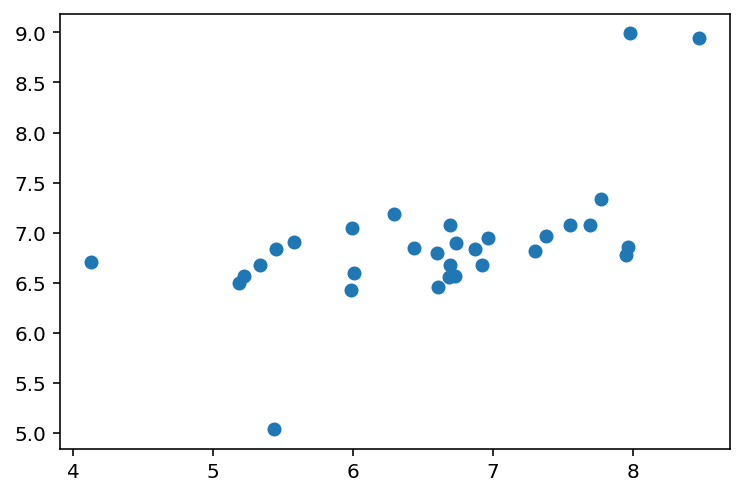

In [32]:
# Visaulization for see sample each point.
plt.scatter(y_test,predictions)

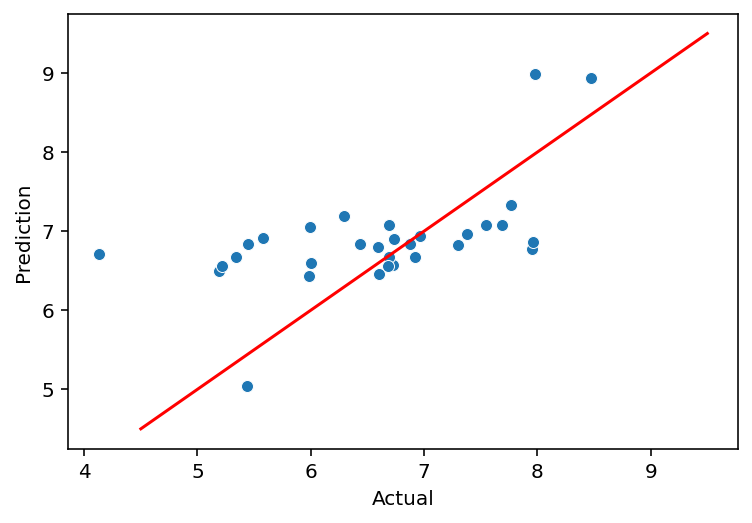

In [42]:
# plot predictions against actual

plot_k = sns.scatterplot(y_test,predictions)
plot_k.set(xlabel='Actual', ylabel='Prediction')
# generate and graph y = x line
x_plot = np.linspace(4.5,9.5,100)
y_plot = x_plot
plt.plot(x_plot, y_plot, color='r')

# Simulate linear line

## Prediction

Actual Patient 6.872128101338986
Predicted Patient 6.841105313854939


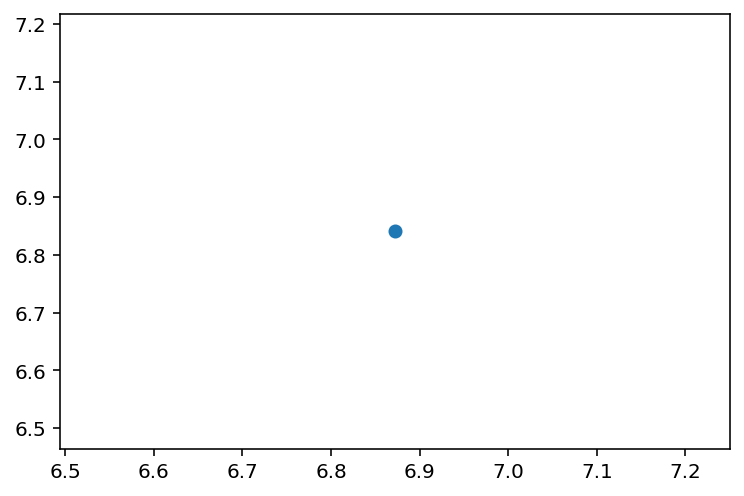

In [34]:
# Choose one of sample to predict and see result

# input : X_test.loc[[random sample for prediction test]]
    
y_pred = lm.predict(X_test.loc[[112]])

plt.scatter(y_test.loc[[112]],  y_pred)
print( "Actual Patient",float(y_test.loc[[112]] ) )
print( "Predicted Patient", float( y_pred))

**Residual Histogram**

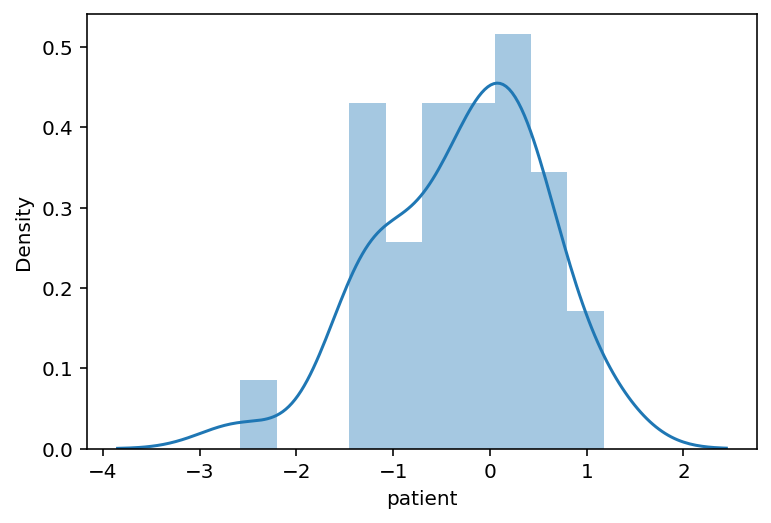

In [43]:
sns.distplot((y_test-predictions),bins=10);

### Actual value and the predicted value

In [36]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': predictions})
mlr_diff.head(20)

,Actual value,Predicted value
155,8.470730,8.941949
149,5.187386,6.500206
299,7.949444,6.775118
203,6.922644,6.676671
92,5.446737,6.839532
216,7.546446,7.081045
15,4.127134,6.706756
187,5.433722,5.040469
204,7.376508,6.968718
239,7.765993,7.335224


In [37]:
# Expo transform to target variable
y_test_exp = np.exp(y_test)
predictions_exp = np.exp(predictions).round(2)

In [38]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test_exp, 'Predicted value': predictions_exp})
mlr_diff.head(20)

,Actual value,Predicted value
155,4773.0,7646.09
149,179.0,665.28
299,2834.0,875.78
203,1015.0,793.67
92,232.0,934.05
216,1894.0,1189.21
15,62.0,817.91
187,229.0,154.54
204,1598.0,1062.86
239,2359.0,1533.37


## Regression Evaluation Metrics


Evaluation metrics for regression problems as below:

**Coefficient of determination(R2 score)** is used to evaluate the performance of a linear regression model. 
It is the amount of the variation in the output dependent attribute which is predictable from the input independent variable(s). It is used to check how well-observed results are reproduced by the model, depending on the ratio of total deviation of results described by the model.

$$R2= 1- SSres  /  SStot$$

**Mean Absolute Error** (MAE): the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE): the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE): the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

**Comparison:**

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.


In [39]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error

print('R squared of Training Set: {:.2f}'.format(lm.score(X_train,y_train)*100))
print('Mean Absolute Error (MAE): {:.4f}'.format(metrics.mean_absolute_error(y_test, predictions)))
print('Mean Squared Error (MSE): {:.4f}'.format(metrics.mean_squared_error(y_test, predictions)))
print('Root Mean Squared Error (RMSE): {:.4f}'.format(np.sqrt(metrics.mean_squared_error(y_test, predictions))))

R squared of Training Set: 38.41
Mean Absolute Error (MAE): 0.6694
Mean Squared Error (MSE): 0.7693
Root Mean Squared Error (RMSE): 0.8771


### Record

In [ ]:
# Version 1.0
# R squared of Training Set: 38.41
# Mean Absolute Error (MAE): 0.6694
# Mean Squared Error (MSE): 0.7693
# Root Mean Squared Error (RMSE): 0.8771
#  30/9/2564 14:00